In [2]:
import pandas as pd
import numpy as np
import random
import os

def seed_everything(seed=42):
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    
seed_everything()

In [3]:
from preprocess import preprocess

def reset_dataframe():
    global df_train
    df_train = preprocess(pd.read_csv("train.csv")) # 학습용 데이터
    global df_test 
    df_test = preprocess(pd.read_csv("submission.csv")) # 테스트용 데이터

In [4]:
reset_dataframe()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [5]:
df_train

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,customer_job,lead_desc_length,...,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,total_area
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,purchasing,62,...,less than 3 months,1,0,0.003079,0.026846,corporateoffice,engineering,0,True,corporateofficeengineering
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,media and communication,96,...,less than 3 months,1,0,0.003079,0.026846,corporateoffice,advertising,1,True,corporateofficeadvertising
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,engineering,56,...,less than 3 months,1,0,0.003079,0.026846,corporateoffice,construction,2,True,corporateofficeconstruction
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,entrepreneurship,44,...,less than 3 months,1,0,0.003079,0.026846,corporateoffice,itsoftware,3,True,corporateofficeitsoftware
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,consulting,97,...,less than 3 months,0,0,0.003079,0.026846,corporateoffice,nan,4,True,corporateofficenan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59294,1.00,/Sląskie/Poland,AS,NaN,33747,End Customer,SMB,NaN,engineering,200,...,3 months ~ 6 months,0,0,0.000026,0.028777,publicfacility,others,694,False,publicfacilityothers
59295,0.75,/Bogotá DC /Colombia,AS,0.040000,35420,Specifier/ Influencer,Enterprise,NaN,entrepreneurship,70,...,9 months ~ 1 year,0,0,0.000026,0.028777,publicfacility,nan,39,False,publicfacilitynan
59296,0.75,/Pisco/Peru,AS,0.040000,19249,Specifier/ Influencer,Enterprise,NaN,engineering,34,...,less than 3 months,0,0,0.000026,0.028777,publicfacility,nan,125,False,publicfacilitynan
59297,1.00,/santa cruz bolivia/Peru,AS,0.040000,40327,NaN,Enterprise,NaN,entrepreneurship,377,...,more than a year,0,0,0.000026,0.028777,publicfacility,nan,134,False,publicfacilitynan


In [4]:
# 결측 변수들

missing_cols = [
    'customer_country',
'com_reg_ver_win_rate',
'customer_type',
'historical_existing_cnt',
'customer_job',
'inquiry_type',
'product_category',
'expected_timeline',
'ver_win_rate_x',
'ver_win_ratio_per_bu',
'business_area',
'business_subarea'
]

In [6]:
missing_df = df_train[missing_cols]

In [7]:
missing_df.isnull().sum()

customer_country             982
com_reg_ver_win_rate       44731
customer_type              43961
historical_existing_cnt    45543
customer_job               18733
inquiry_type                 941
product_category           19374
expected_timeline              0
ver_win_rate_x             40882
ver_win_ratio_per_bu       43995
business_area                  0
business_subarea               0
dtype: int64

<AxesSubplot:>

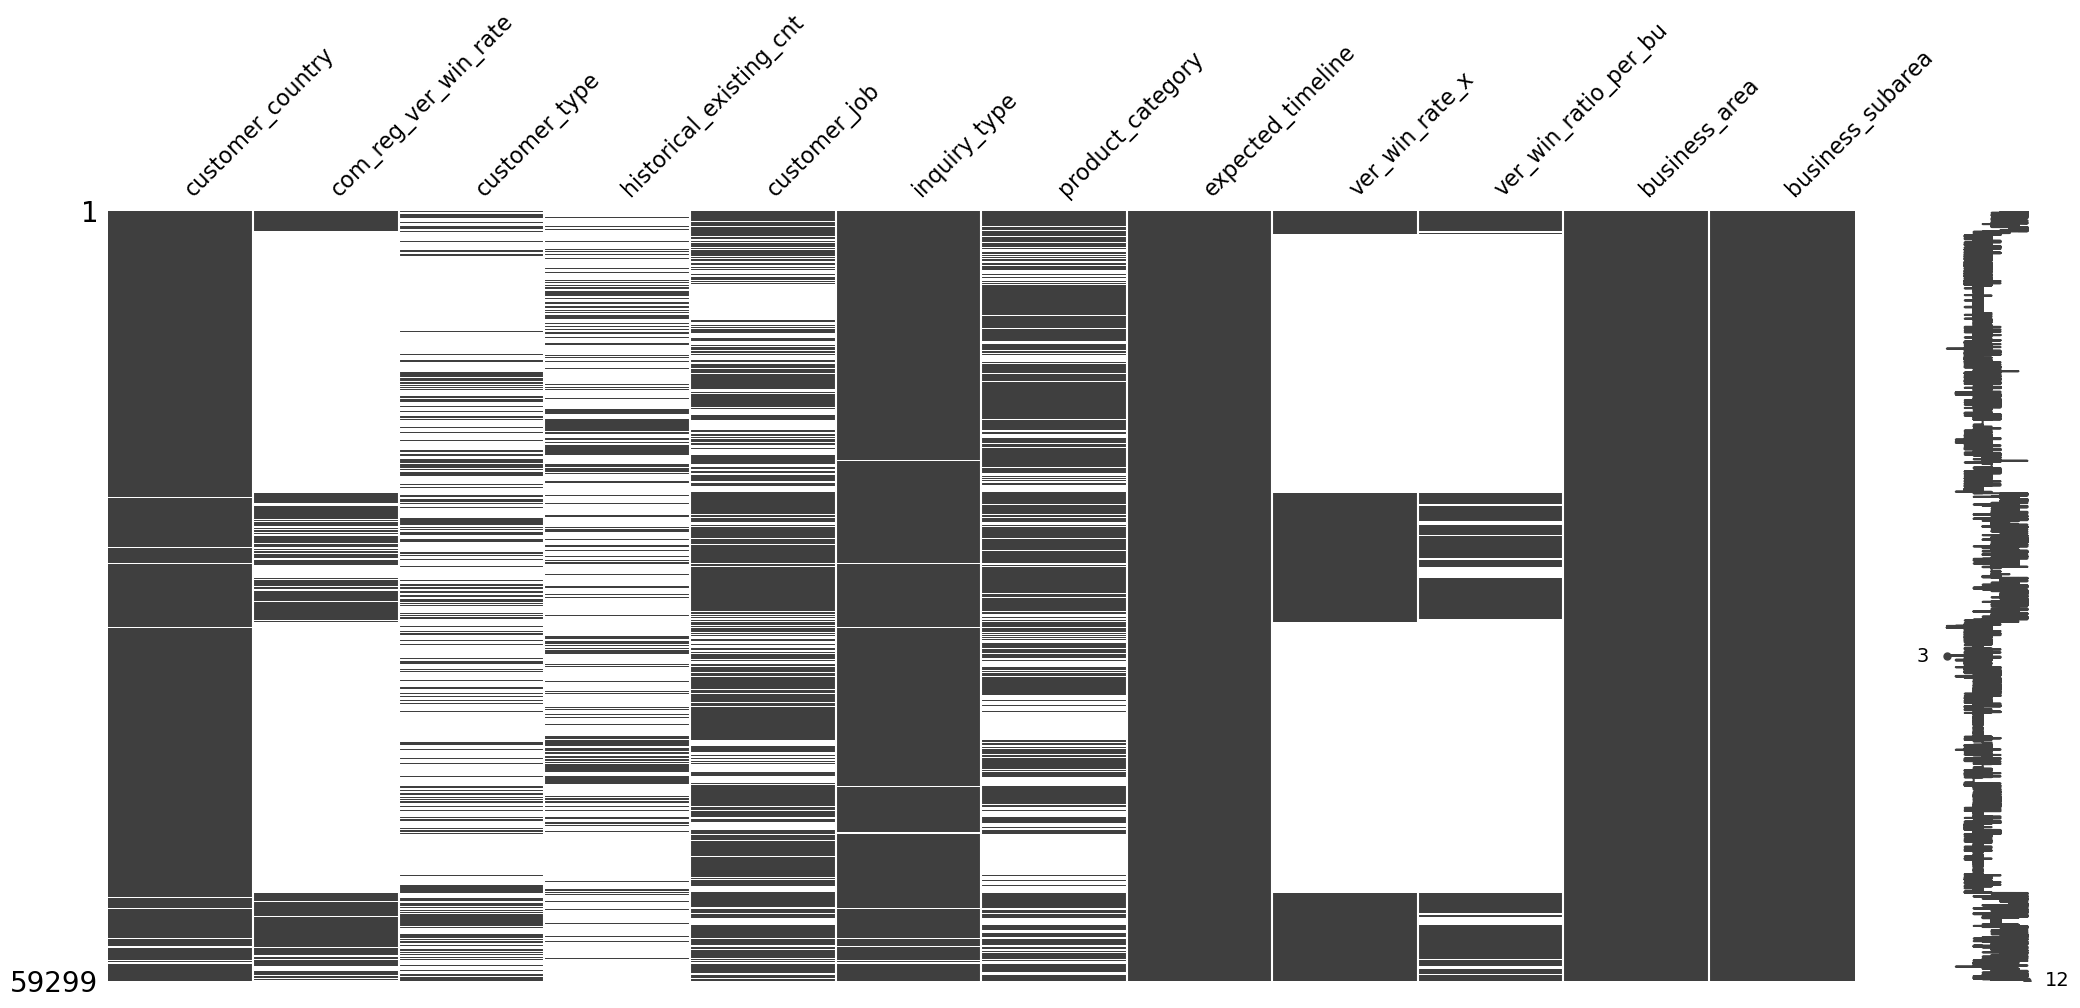

In [8]:
#!pip install missingno
import missingno as msno

msno.matrix(missing_df)

<AxesSubplot:>

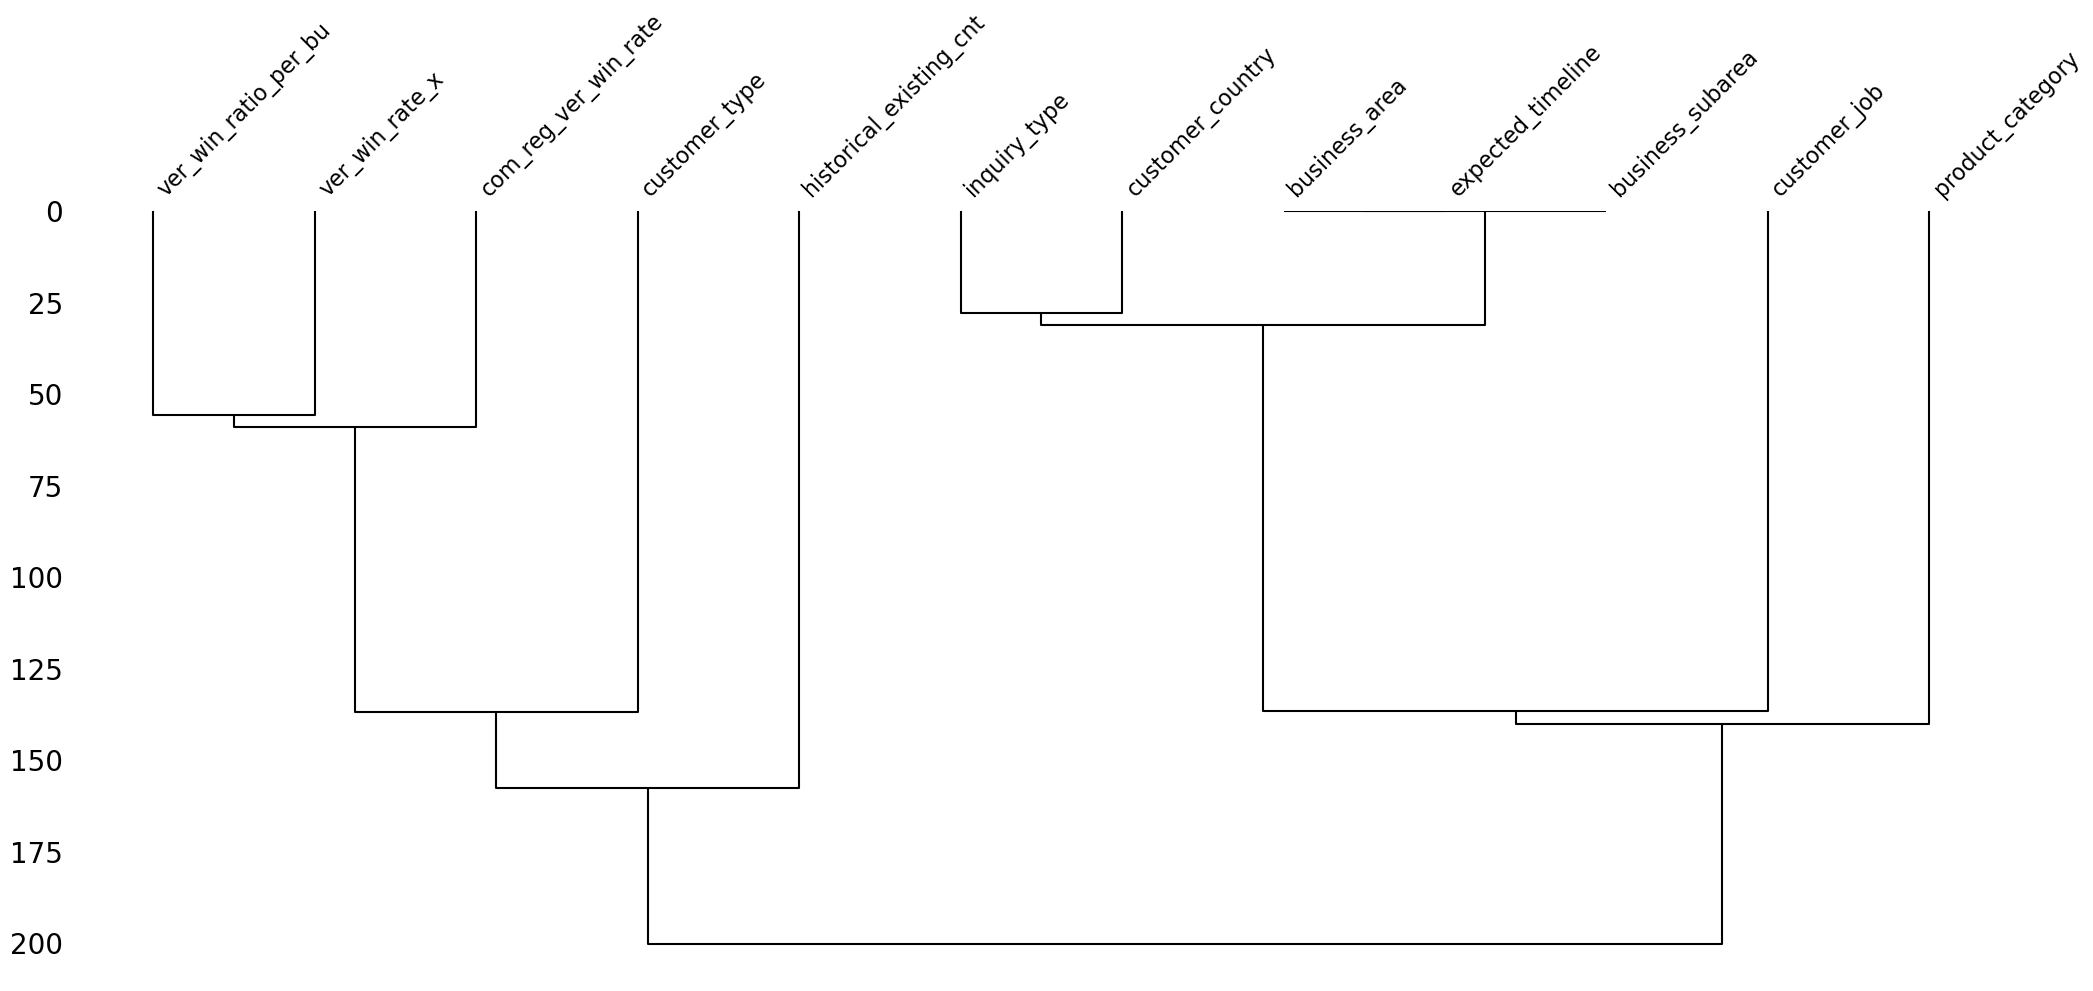

In [9]:
msno.dendrogram(missing_df)

### 결측치 처리

In [65]:
reset_dataframe()

c:\Users\user\Desktop\Code\preprocess.py:90: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r'[^\w\s]', "")
c:\Users\user\Desktop\Code\preprocess.py:90: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r'[^\w\s]', "")


In [66]:
df_train.columns

Index(['bant_submit', 'customer_country', 'business_unit',
       'com_reg_ver_win_rate', 'customer_idx', 'customer_type', 'enterprise',
       'historical_existing_cnt', 'customer_job', 'lead_desc_length',
       'inquiry_type', 'product_category', 'customer_position',
       'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
       'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area',
       'business_subarea', 'lead_owner', 'is_converted', 'total_area'],
      dtype='object')

In [67]:
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    'total_area',
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

In [68]:
numeric_columns = list(set(df_train.columns) - set(label_columns))

### mean + most_frequent

In [69]:
from sklearn.impute import SimpleImputer

frequent_imputer = SimpleImputer(strategy='most_frequent')
df_train[label_columns] = frequent_imputer.fit_transform(df_train[label_columns])
df_test[label_columns] = frequent_imputer.transform(df_test[label_columns])

In [70]:
mean_imputer = SimpleImputer(strategy='mean')
df_train[numeric_columns] = mean_imputer.fit_transform(df_train[numeric_columns])
df_test[numeric_columns] = mean_imputer.transform(df_test[numeric_columns])

###  정규분포 값 채우기

In [72]:
reset_dataframe()

c:\Users\user\Desktop\Code\preprocess.py:90: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r'[^\w\s]', "")
c:\Users\user\Desktop\Code\preprocess.py:90: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r'[^\w\s]', "")


In [73]:
for column in numeric_columns:
    # 열의 평균과 표준편차 계산
    mean = df_train[column].mean()
    std = df_train[column].std()
    
    # 결측치가 있는 인덱스 찾기
    missing_indices = df_train[df_train[column].isnull()].index
    
    # 결측치를 정규 분포에서 추출된 값으로 채우기
    df_train.loc[missing_indices, column] = np.random.normal(loc=mean, scale=std, size=len(missing_indices))

for column in numeric_columns:
    
    # 결측치가 있는 인덱스 찾기
    missing_indices = df_test[df_test[column].isnull()].index
    
    # 결측치를 정규 분포에서 추출된 값으로 채우기
    df_test.loc[missing_indices, column] = np.random.normal(loc=mean, scale=std, size=len(missing_indices))



### 숫자형은 0으로 범주형은 most_frequent

In [78]:
reset_dataframe()

c:\Users\user\Desktop\Code\preprocess.py:90: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r'[^\w\s]', "")
c:\Users\user\Desktop\Code\preprocess.py:90: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r'[^\w\s]', "")


In [79]:
from sklearn.impute import SimpleImputer

frequent_imputer = SimpleImputer(strategy='most_frequent')
df_train[label_columns] = frequent_imputer.fit_transform(df_train[label_columns])
df_test[label_columns] = frequent_imputer.transform(df_test[label_columns])

# 라벨링 및 모델 성능 확인

In [76]:
# reset_dataframe()
# label_columns = [
#     "customer_country",
#     "business_subarea",
#     "business_area",
#     "business_unit",
#     'total_area',
#     "customer_type",
#     "enterprise",
#     "customer_job",
#     "inquiry_type",
#     "product_category",
#     "customer_position",
#     "response_corporate",
#     "expected_timeline",
# ]
# numeric_columns = list(set(df_train.columns) - set(label_columns))


c:\Users\user\Desktop\Code\preprocess.py:90: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r'[^\w\s]', "")
c:\Users\user\Desktop\Code\preprocess.py:90: FutureWarning: The default value of regex will change from True to False in a future version.
  df[col] = df[col].str.replace(r'[^\w\s]', "")


In [80]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

# 레이블 인코딩할 칼럼들

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])


from sklearn.model_selection import train_test_split

for col in label_columns:  
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]
    
x_train, x_val, y_train, y_val = train_test_split(
    df_train.drop("is_converted", axis=1),
    df_train["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=42,
    
)

y_train = y_train.astype('int')
y_val = y_val.astype('int')

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train.fillna(0), y_train) ####################


from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

pred = model.predict(x_val.fillna(0)) ###################
get_clf_eval(y_val, pred)

오차행렬:
 [[  732   253]
 [  249 10626]]

정확도: 0.9577
정밀도: 0.7462
재현율: 0.7431
F1: 0.7447


# 성능 결과

- 기존 fillna(0)

오차행렬:
[[  775   210]
[  254 10621]]

정확도: 0.9609
정밀도: 0.7532
재현율: 0.7868
F1: 0.7696

- fillna(1)

오차행렬:
 [[  777   208]
 [  201 10674]]

정확도: 0.9655
정밀도: 0.7945
재현율: 0.7888
F1: 0.7916

- Mean + Most_frequent


오차행렬:
 [[  739   246]
 [  263 10612]]

정확도: 0.9571
정밀도: 0.7375
재현율: 0.7503
F1: 0.7438

- 정규분포

오차행렬:
 [[  722   263]
 [  228 10647]]

정확도: 0.9586
정밀도: 0.7600
재현율: 0.7330
F1: 0.7463

- 숫자형은 0 범주형은 most_frequent

오차행렬:
 [[  732   253]
 [  249 10626]]

정확도: 0.9577
정밀도: 0.7462
재현율: 0.7431
F1: 0.7447